# Autumn's exploration

Looking for periodic behaviour.

TODO: Scatter 1:many of each power column against every weather column

In [47]:
# Preliminary setup
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [48]:
# Import dataset from df.pickle
nrg = pd.read_pickle('alldata_clean.pickle')
wx = pd.read_pickle('allwxdata.pickle')
df = pd.merge(nrg,wx,how='outer',left_index=True,right_index=True)

In [49]:
# Interpolate weather
df.relh.interpolate(inplace=True)
df.tmpc.interpolate(inplace=True)
df.alti.interpolate(inplace=True)
df.dwpc.interpolate(inplace=True)
df.drct.fillna(method='ffill',inplace=True) # Avoids having to deal with wind crossing north (360->0)
#pd.options.display.max_rows = 2000

# Delete pre-energy rows
df = df[~df.active.isnull()]
all = df # Store for later

# Energy columns vs Weather columns

In [51]:
ecols = ['active', 'sub1', 'sub2', 'sub3', 'house']
#ecols = ['sub1', 'sub2', 'sub3']
wxcols = ['relh','drct','alti','tmpc','dwpc']
df = df[ecols+wxcols].resample('1h').mean()

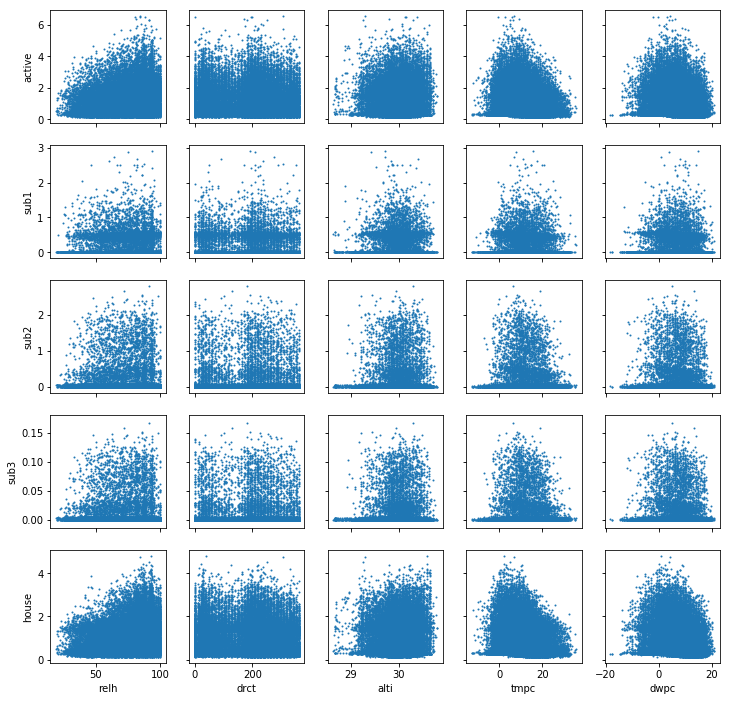

In [65]:
f, axes = plt.subplots(  nrows=len(ecols)
                       , ncols=len(wxcols)
                       , figsize=(12,12)
                       , sharex='col'
                       , sharey='row')  

for irow in range(0,len(ecols)):
    for icol,ax in enumerate(axes[irow,:]):
        en = ecols[irow]
        wx = wxcols[icol]
        df.plot.scatter(x=wx,y=en
                        ,ax=ax
                        ,s=1)
            